___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (8,5)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#pip install skimpy

In [7]:
from skimpy import clean_columns


In [8]:
df = clean_columns(df)

14 column names have been cleaned

In [9]:
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [10]:
df.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [11]:
df.duplicated().sum()

0

In [12]:
df.nunique()

row_number          10000
customer_id         10000
surname              2932
credit_score          460
geography               3
gender                  2
age                    70
tenure                 11
balance              6382
num_of_products         4
has_cr_card             2
is_active_member        2
estimated_salary     9999
exited                  2
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
row_number,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
customer_id,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
credit_score,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
num_of_products,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
has_cr_card,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
is_active_member,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
estimated_salary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [14]:
df.describe(include="O").T

,count,unique,top,freq
surname,10000,2932,Smith,32
geography,10000,3,France,5014
gender,10000,2,Male,5457


In [15]:
df.shape

(10000, 14)

## geography / gender

In [16]:
df.geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [17]:
df.gender.value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [18]:
df.replace({"gender":{"Male":0, "Female":1}, "geography":{"France":0, "Germany":1, "Spain":2}}, inplace=True)

In [19]:
df.gender.value_counts()

0    5457
1    4543
Name: gender, dtype: int64

In [20]:
df.geography.value_counts()

0    5014
1    2509
2    2477
Name: geography, dtype: int64

In [21]:
df.has_cr_card.value_counts()

1    7055
0    2945
Name: has_cr_card, dtype: int64

In [22]:
drop_list = ["row_number", "customer_id", "surname"]

In [23]:
df.drop(columns=drop_list, inplace=True)

In [24]:
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,0,1,42,2,0.000,1,1,1,101348.880,1
1,608,2,1,41,1,83807.860,1,0,1,112542.580,0
2,502,0,1,42,8,159660.800,3,1,0,113931.570,1
3,699,0,1,39,1,0.000,2,0,0,93826.630,0
4,850,2,1,43,2,125510.820,1,1,1,79084.100,0


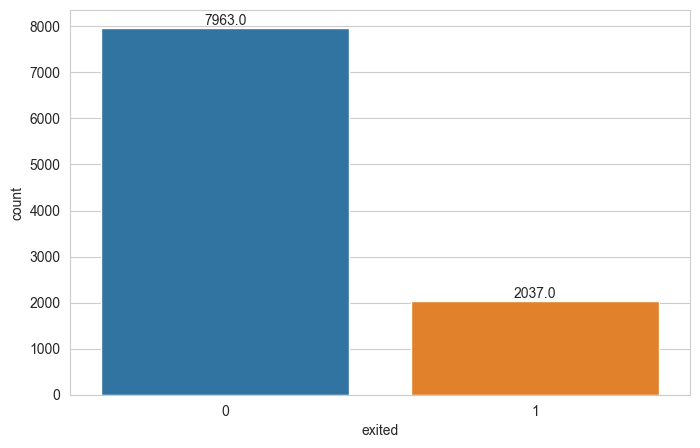

In [25]:
ax = sns.countplot(data=df, x="exited");

for i in ax.containers:
    ax.bar_label(i, fmt="%.1f");

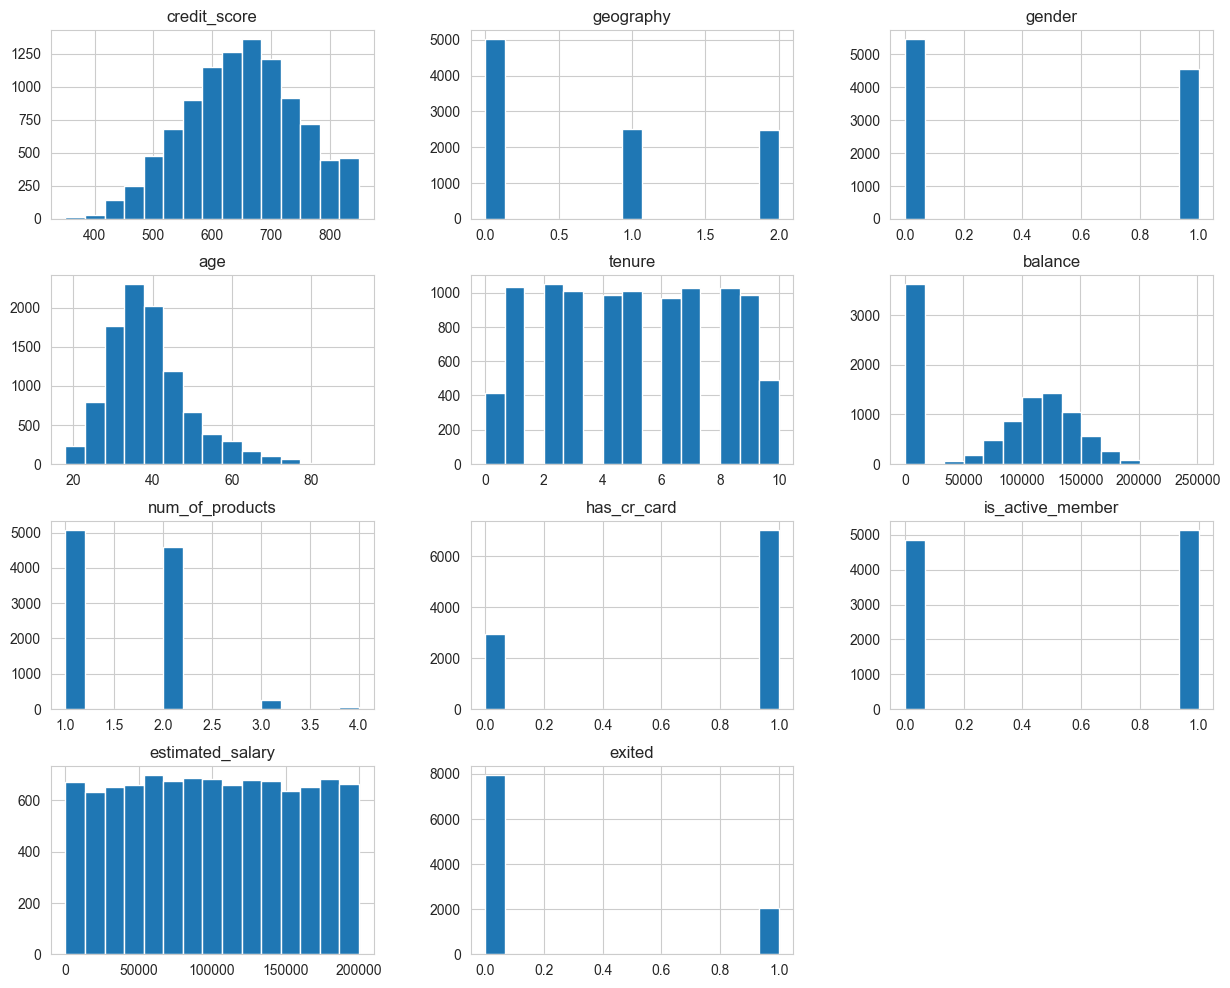

In [26]:
df.hist(figsize=(15, 12), bins=15);

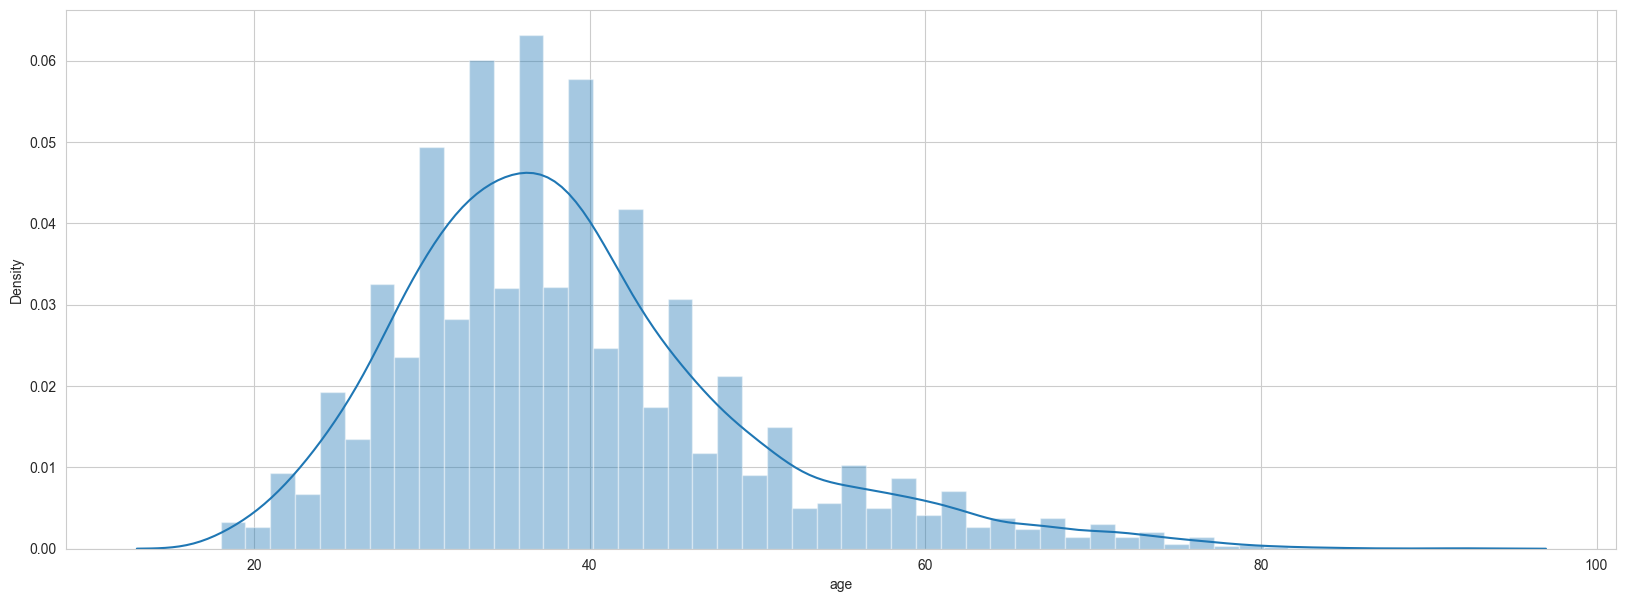

In [27]:
plt.figure(figsize=(20, 7))
sns.distplot(df.age);

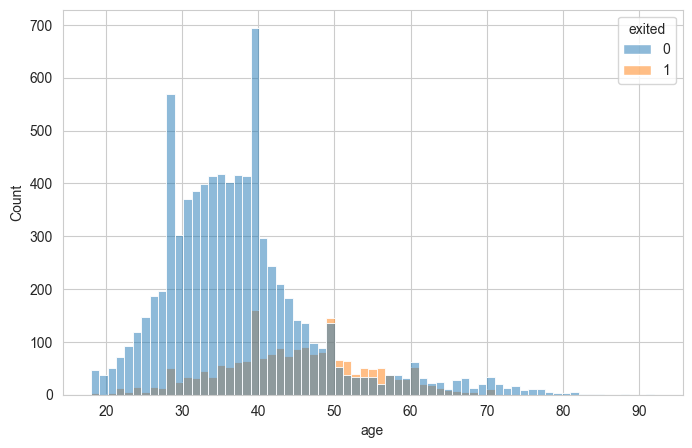

In [28]:
sns.histplot(data = df, x = "age", hue = "exited", fill=True);

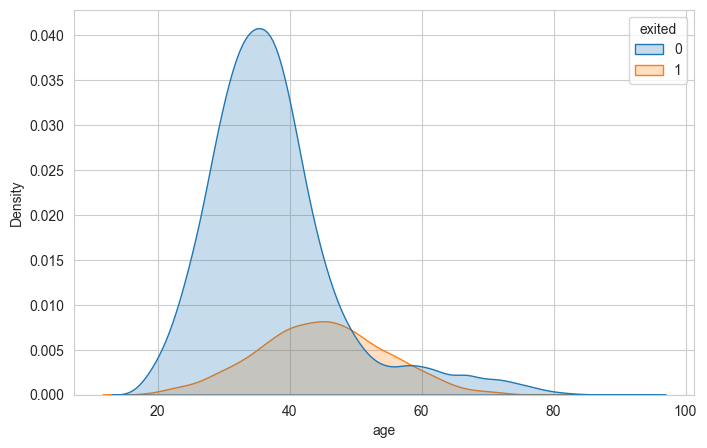

In [29]:
sns.kdeplot(data = df, x = "age", hue = "exited", fill=True);

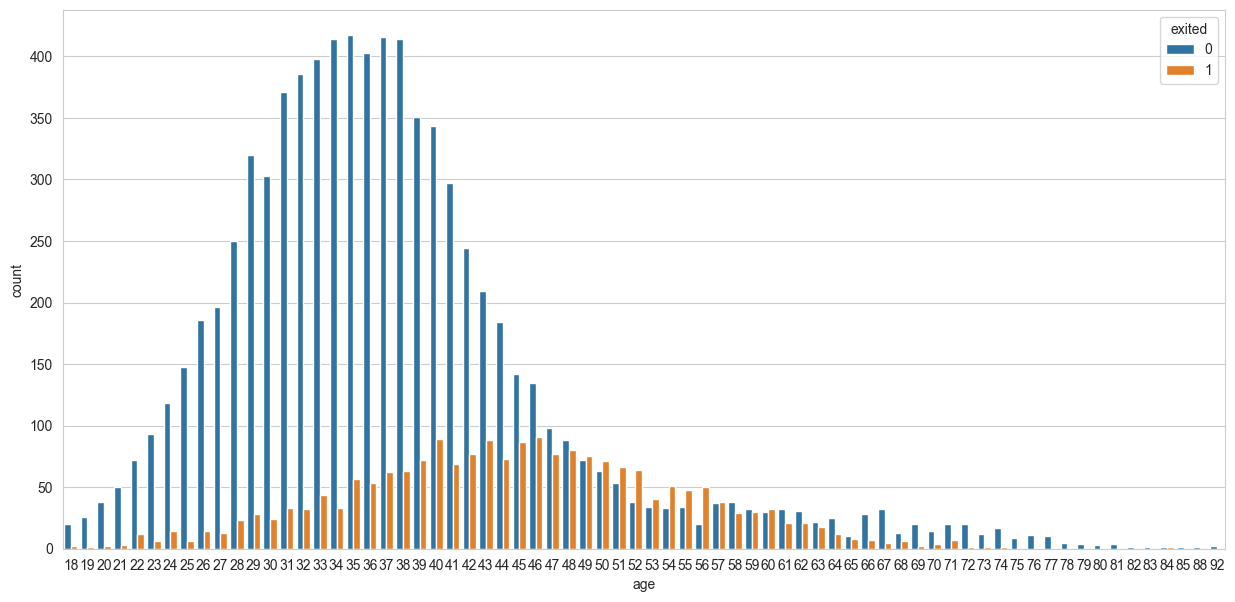

In [30]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x="age", hue=df.exited);

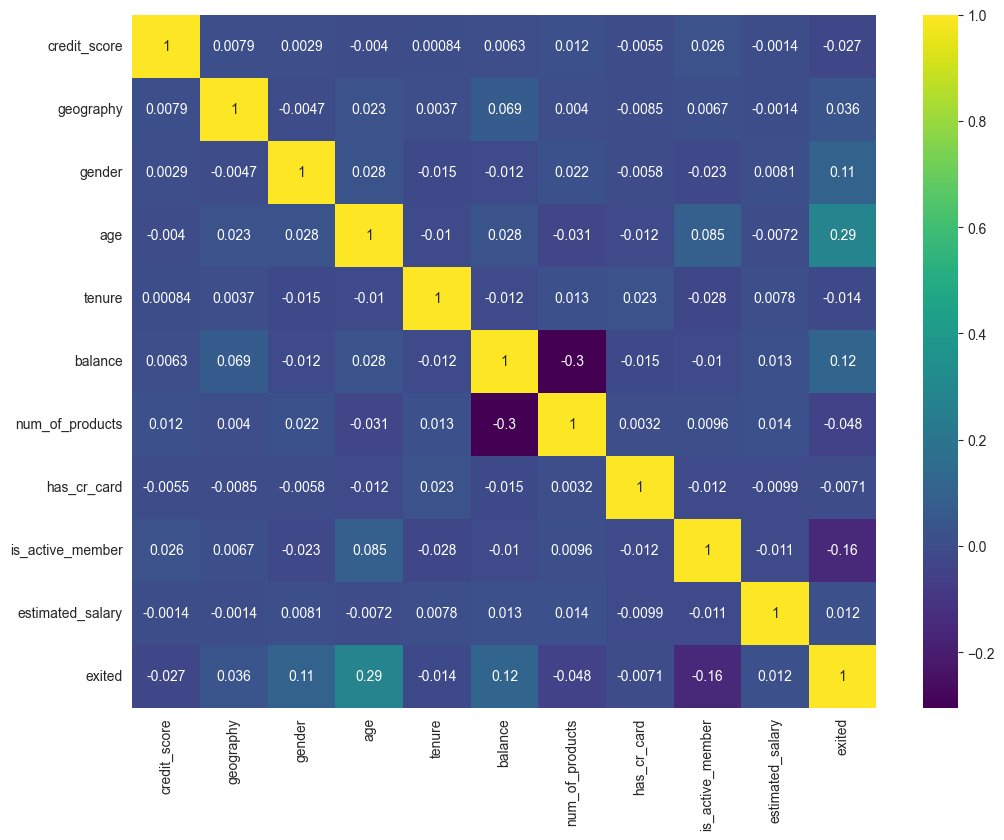

In [31]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, cmap='viridis');

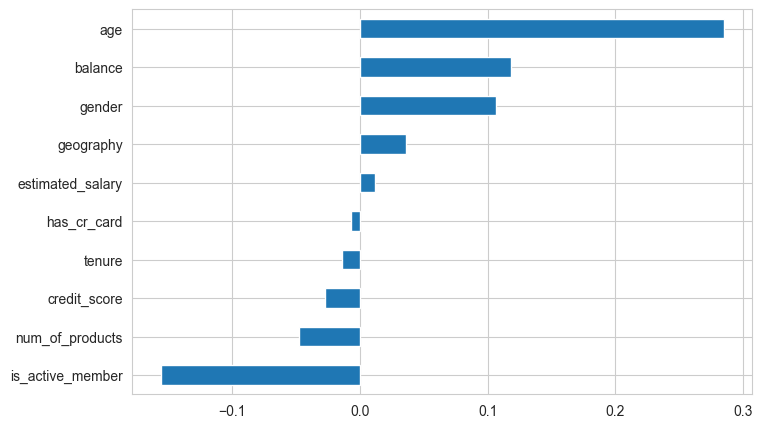

In [32]:
df.corr()['exited'][:-1].sort_values().plot.barh();

# Preprocessing of Data
- Train | Test Split, Scalling

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [35]:
seed = 42

In [36]:
X = df.drop("exited", axis=1)
y = df["exited"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed
) 

In [37]:
scaler = MinMaxScaler()

In [38]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (9000, 10)
Train target shape   :  (9000,)
Test features shape  :  (1000, 10)
Test target shape    :  (1000,)


# Modelling & Model Performance

## without class_weigth

In [40]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

### Create The Model

In [41]:
model.fit(x=X_train, y=y_train, validation_split=.1, batch_size=100, epochs=300, verbose=1)

Epoch 1/300
81/81 [==============================] - 1s 6ms/step - loss: 0.5359 - recall: 0.0000e+00 - val_loss: 0.4984 - val_recall: 0.0000e+00
Epoch 2/300
81/81 [==============================] - 0s 3ms/step - loss: 0.4916 - recall: 0.0000e+00 - val_loss: 0.4719 - val_recall: 0.0000e+00
Epoch 3/300
81/81 [==============================] - 0s 3ms/step - loss: 0.4733 - recall: 0.0000e+00 - val_loss: 0.4547 - val_recall: 0.0000e+00
Epoch 4/300
81/81 [==============================] - 0s 3ms/step - loss: 0.4598 - recall: 0.0103 - val_loss: 0.4419 - val_recall: 0.0552
Epoch 5/300
81/81 [==============================] - 0s 3ms/step - loss: 0.4501 - recall: 0.0896 - val_loss: 0.4307 - val_recall: 0.1271
Epoch 6/300
81/81 [==============================] - 0s 3ms/step - loss: 0.4414 - recall: 0.1217 - val_loss: 0.4228 - val_recall: 0.1271
Epoch 7/300
81/81 [==============================] - 0s 3ms/step - loss: 0.4356 - recall: 0.1616 - val_loss: 0.4132 - val_recall: 0.2652
Epoch 8/300
81/81

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

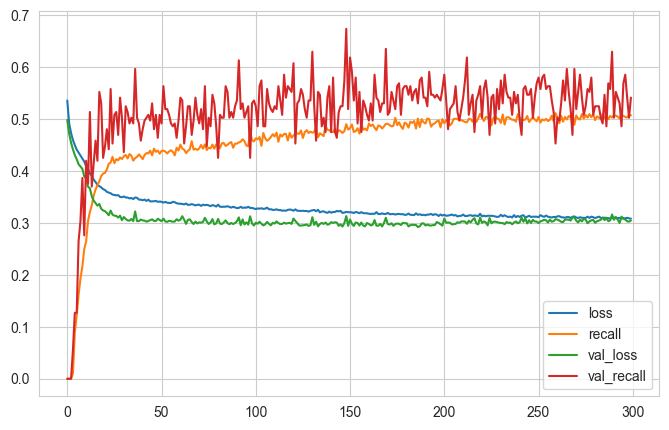

In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [44]:
model.evaluate(X_test, y_test, verbose=0)

[0.3771037459373474, 0.4313725531101227]

In [45]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3771037459373474
accuracy :  0.4313725531101227


In [46]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[758  38]
 [116  88]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.70      0.43      0.53       204

    accuracy                           0.85      1000
   macro avg       0.78      0.69      0.72      1000
weighted avg       0.83      0.85      0.83      1000



### Precision-Recall Curve and AP (Average Precision) for model

32/32 [==============================] - 0s 2ms/step


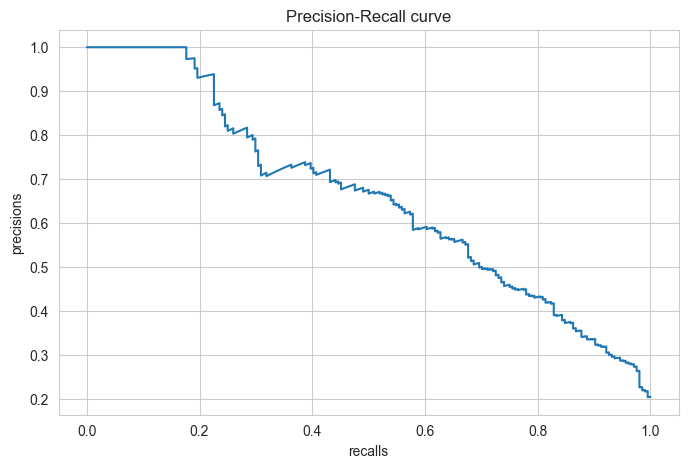

In [47]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [49]:
average_precision_score(y_test, y_pred_proba)

0.6582592725474103

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [50]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [51]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

### Create The Model

In [52]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 7ms/step - loss: 0.6865 - recall: 0.6574 - val_loss: 0.6735 - val_recall: 0.6796
Epoch 2/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6642 - recall: 0.6459 - val_loss: 0.6838 - val_recall: 0.7459
Epoch 3/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6419 - recall: 0.6852 - val_loss: 0.6164 - val_recall: 0.6464
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6247 - recall: 0.6719 - val_loss: 0.5977 - val_recall: 0.6575
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6102 - recall: 0.6858 - val_loss: 0.5775 - val_recall: 0.6409
Epoch 6/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5972 - recall: 0.6840 - val_loss: 0.5346 - val_recall: 0.6077
Epoch 7/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5866 - recall: 0.6889 - val_loss: 0.5676 - val_recall: 0.7127
Epoch 8/300
64/64 [======================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<AxesSubplot:>

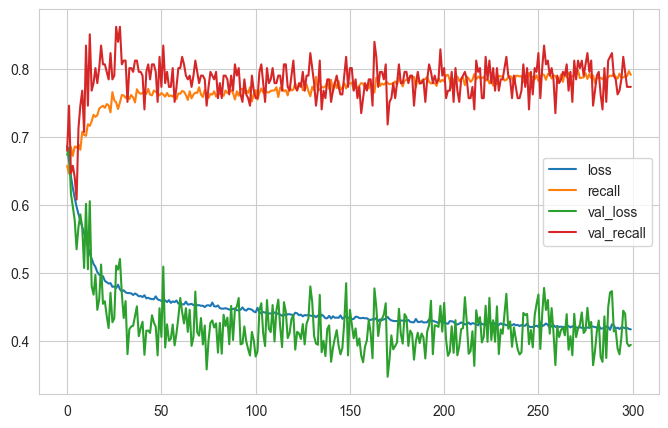

In [53]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [54]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[643 153]
 [ 56 148]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       796
           1       0.49      0.73      0.59       204

    accuracy                           0.79      1000
   macro avg       0.71      0.77      0.72      1000
weighted avg       0.83      0.79      0.80      1000



### Precision-Recall Curve and AP (Average Precision) for model

32/32 [==============================] - 0s 2ms/step


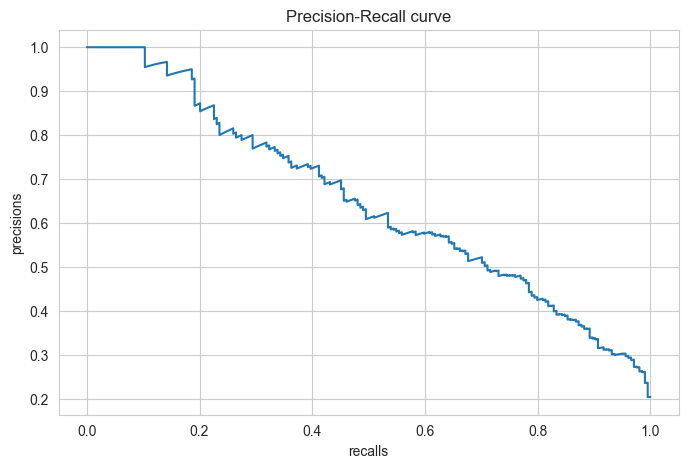

In [55]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label="ANN")
plt.xlabel("recalls")
plt.ylabel("precisions")
plt.title("Precision-Recall curve")
plt.show()

In [56]:
average_precision_score(y_test, y_pred_proba)

0.6493006845268666

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [57]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

# lr=0.01 => led to overfitting
# lr=0.005 => led to overfitting
# lr=0.003 => led to overfitting

In [58]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 7ms/step - loss: 0.6612 - recall: 0.6429 - val_loss: 0.6040 - val_recall: 0.6796
Epoch 2/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6046 - recall: 0.6792 - val_loss: 0.6779 - val_recall: 0.8398
Epoch 3/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5777 - recall: 0.6889 - val_loss: 0.5929 - val_recall: 0.8066
Epoch 4/300
64/64 [==============================] - 0s 3ms/step - loss: 0.5462 - recall: 0.7167 - val_loss: 0.5839 - val_recall: 0.8398
Epoch 5/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5319 - recall: 0.7215 - val_loss: 0.4825 - val_recall: 0.7901
Epoch 6/300
64/64 [==============================] - 0s 4ms/step - loss: 0.5089 - recall: 0.7306 - val_loss: 0.4939 - val_recall: 0.8066
Epoch 7/300
64/64 [==============================] - 0s 5ms/step - loss: 0.5023 - recall: 0.7585 - val_loss: 0.4364 - val_recall: 0.7901
Epoch 8/300
64/64 [======================

<AxesSubplot:>

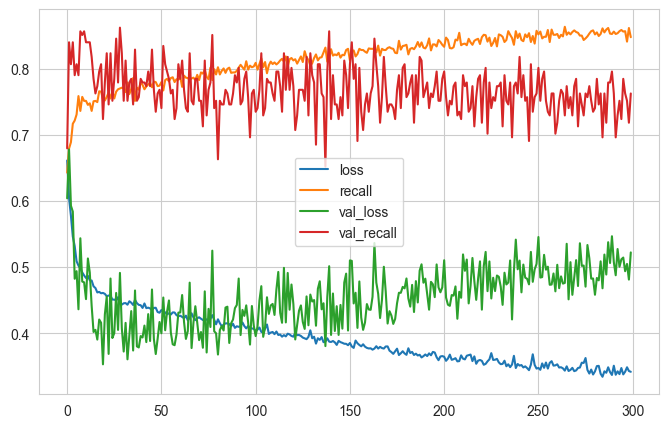

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [60]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[600 196]
 [ 50 154]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       796
           1       0.44      0.75      0.56       204

    accuracy                           0.75      1000
   macro avg       0.68      0.75      0.69      1000
weighted avg       0.82      0.75      0.77      1000



### Add Dropout Layer

In [61]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [62]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 2s 7ms/step - loss: 0.7245 - recall: 0.0630 - val_loss: 0.6531 - val_recall: 0.0608
Epoch 2/300
64/64 [==============================] - 0s 4ms/step - loss: 0.6842 - recall: 0.2815 - val_loss: 0.6434 - val_recall: 0.5249
Epoch 3/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6781 - recall: 0.5387 - val_loss: 0.6267 - val_recall: 0.6022
Epoch 4/300
64/64 [==============================] - 0s 6ms/step - loss: 0.6742 - recall: 0.6120 - val_loss: 0.6201 - val_recall: 0.6519
Epoch 5/300
64/64 [==============================] - 0s 6ms/step - loss: 0.6682 - recall: 0.6435 - val_loss: 0.6466 - val_recall: 0.7459
Epoch 6/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6595 - recall: 0.6858 - val_loss: 0.6278 - val_recall: 0.7293
Epoch 7/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6584 - recall: 0.7113 - val_loss: 0.6229 - val_recall: 0.7293
Epoch 8/300
64/64 [======================

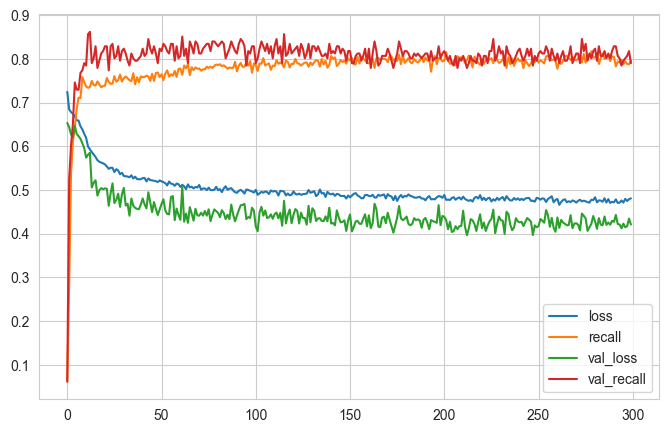

In [63]:
loss_bc = pd.DataFrame(model.history.history)
loss_bc.plot();

In [64]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[613 183]
 [ 47 157]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       796
           1       0.46      0.77      0.58       204

    accuracy                           0.77      1000
   macro avg       0.70      0.77      0.71      1000
weighted avg       0.83      0.77      0.79      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [65]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [66]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="min",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [67]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 2s 10ms/step - loss: 0.6686 - recall: 0.5678 - val_loss: 0.6285 - val_recall: 0.6685
Epoch 2/300
64/64 [==============================] - 0s 7ms/step - loss: 0.6290 - recall: 0.6090 - val_loss: 0.6342 - val_recall: 0.7901
Epoch 3/300
64/64 [==============================] - 0s 6ms/step - loss: 0.6030 - recall: 0.6338 - val_loss: 0.5261 - val_recall: 0.6354
Epoch 4/300
64/64 [==============================] - 0s 6ms/step - loss: 0.5825 - recall: 0.6671 - val_loss: 0.5261 - val_recall: 0.7569
Epoch 5/300
64/64 [==============================] - 0s 7ms/step - loss: 0.5693 - recall: 0.6810 - val_loss: 0.5002 - val_recall: 0.7901
Epoch 6/300
64/64 [==============================] - 0s 6ms/step - loss: 0.5543 - recall: 0.7046 - val_loss: 0.4756 - val_recall: 0.8232
Epoch 7/300
64/64 [==============================] - 0s 7ms/step - loss: 0.5433 - recall: 0.7270 - val_loss: 0.4797 - val_recall: 0.8177
Epoch 8/300
64/64 [=====================

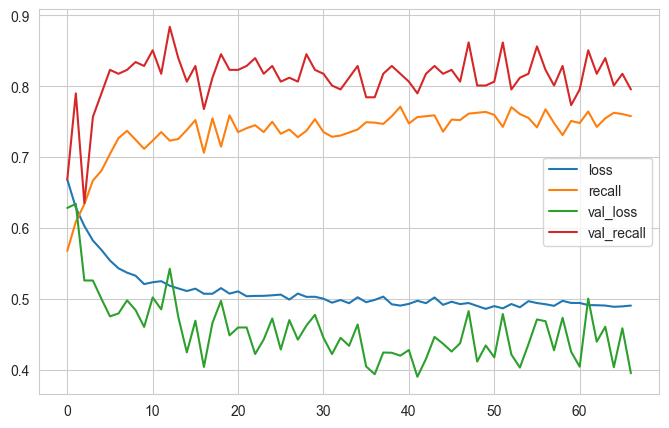

In [69]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [70]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[651 145]
 [ 55 149]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       796
           1       0.51      0.73      0.60       204

    accuracy                           0.80      1000
   macro avg       0.71      0.77      0.73      1000
weighted avg       0.84      0.80      0.81      1000



#### Monitor the "val_recall" as metric

In [71]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [72]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [73]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 2s 9ms/step - loss: 0.6837 - recall: 0.5254 - val_loss: 0.6505 - val_recall: 0.7182
Epoch 2/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6551 - recall: 0.7203 - val_loss: 0.6509 - val_recall: 0.7956
Epoch 3/300
64/64 [==============================] - 0s 7ms/step - loss: 0.6280 - recall: 0.7113 - val_loss: 0.5881 - val_recall: 0.7624
Epoch 4/300
64/64 [==============================] - 0s 7ms/step - loss: 0.6057 - recall: 0.6870 - val_loss: 0.5611 - val_recall: 0.7293
Epoch 5/300
64/64 [==============================] - 0s 6ms/step - loss: 0.5866 - recall: 0.7070 - val_loss: 0.4794 - val_recall: 0.6740
Epoch 6/300
64/64 [==============================] - 0s 6ms/step - loss: 0.5646 - recall: 0.6870 - val_loss: 0.4477 - val_recall: 0.7182
Epoch 7/300
64/64 [==============================] - 0s 6ms/step - loss: 0.5585 - recall: 0.7209 - val_loss: 0.4833 - val_recall: 0.8232
Epoch 8/300
64/64 [======================

<AxesSubplot:>

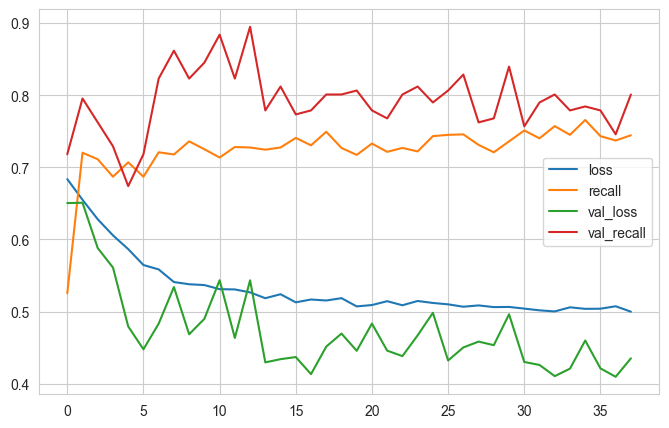

In [74]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [75]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[502 294]
 [ 28 176]]
              precision    recall  f1-score   support

           0       0.95      0.63      0.76       796
           1       0.37      0.86      0.52       204

    accuracy                           0.68      1000
   macro avg       0.66      0.75      0.64      1000
weighted avg       0.83      0.68      0.71      1000



## GridSearchCV

In [76]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [77]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [78]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [79]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=15,
                           restore_best_weights = True)

In [80]:
tf.random.set_seed(seed)
classifier = KerasClassifier(build_fn=build_classifier, validation_split = 0.1, epochs=200)

parameters = {'batch_size': [128, 256],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/200
32/32 [==============================] - 2s 15ms/step - loss: 0.6780 - recall: 0.5466 - val_loss: 0.6355 - val_recall: 0.6961
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6548 - recall: 0.6743 - val_loss: 0.6210 - val_recall: 0.7072
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6347 - recall: 0.6683 - val_loss: 0.5973 - val_recall: 0.6851
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6188 - recall: 0.6659 - val_loss: 0.5597 - val_recall: 0.6575
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.5971 - recall: 0.6925 - val_loss: 0.5012 - val_recall: 0.6630
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.5811 - recall: 0.6870 - val_loss: 0.4917 - val_recall: 0.7182
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 0.5633 - recall: 0.7016 - val_loss: 0.4413

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000018E142A33D0>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [81]:
grid_model.best_score_

0.8468193375747933

In [82]:
grid_model.best_params_

{'batch_size': 256,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.nadam.Nadam}

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [83]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[539 257]
 [ 36 168]]
              precision    recall  f1-score   support

           0       0.94      0.68      0.79       796
           1       0.40      0.82      0.53       204

    accuracy                           0.71      1000
   macro avg       0.67      0.75      0.66      1000
weighted avg       0.83      0.71      0.73      1000



### Precision-Recall Curve and AP (Average Precision) for grid_model

32/32 [==============================] - 0s 3ms/step


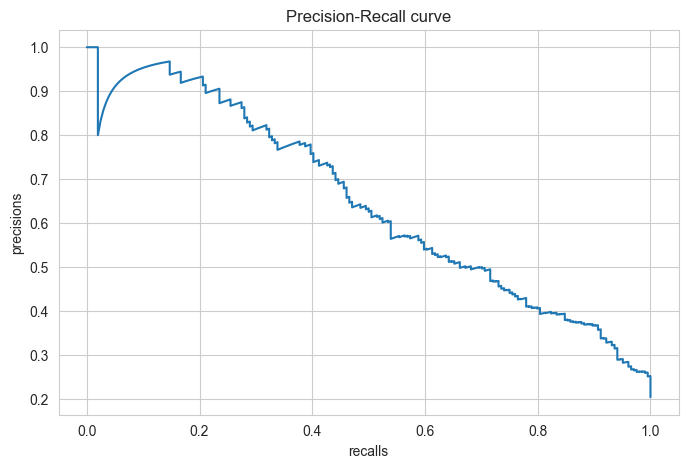

In [84]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [85]:
average_precision_score(y_test, y_pred_proba)

0.646608201510598

# Final Model and Model Deployment

In [86]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [87]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = RMSprop(lr=0.005)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=15,
                           restore_best_weights = True)
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
71/71 [==============================] - 1s 7ms/step - loss: 0.6478 - recall: 0.6197 - val_loss: 0.5995 - val_recall: 0.6324
Epoch 2/200
71/71 [==============================] - 0s 3ms/step - loss: 0.6042 - recall: 0.6830 - val_loss: 0.5801 - val_recall: 0.6667
Epoch 3/200
71/71 [==============================] - 0s 3ms/step - loss: 0.5800 - recall: 0.7032 - val_loss: 0.6003 - val_recall: 0.7353
Epoch 4/200
71/71 [==============================] - 0s 3ms/step - loss: 0.5590 - recall: 0.7081 - val_loss: 0.5374 - val_recall: 0.7059
Epoch 5/200
71/71 [==============================] - 0s 3ms/step - loss: 0.5426 - recall: 0.7239 - val_loss: 0.5069 - val_recall: 0.7010
Epoch 6/200
71/71 [==============================] - 0s 3ms/step - loss: 0.5281 - recall: 0.7239 - val_loss: 0.5897 - val_recall: 0.8088
Epoch 7/200
71/71 [==============================] - 0s 3ms/step - loss: 0.5133 - recall: 0.7458 - val_loss: 0.4863 - val_recall: 0.7059
Epoch 8/200
71/71 [======================

<AxesSubplot:>

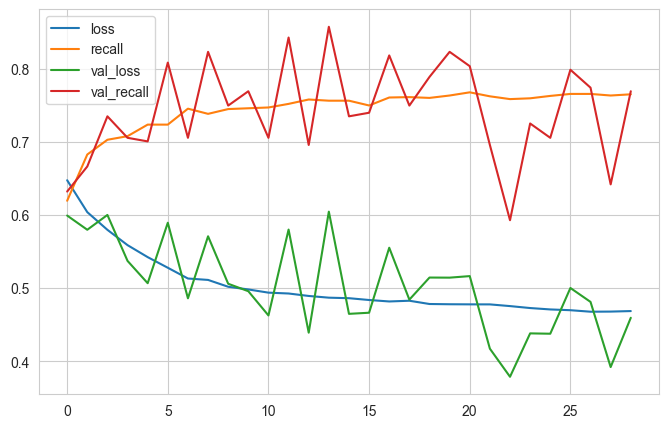

In [88]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [89]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[478 318]
 [ 29 175]]
              precision    recall  f1-score   support

           0       0.94      0.60      0.73       796
           1       0.35      0.86      0.50       204

    accuracy                           0.65      1000
   macro avg       0.65      0.73      0.62      1000
weighted avg       0.82      0.65      0.69      1000



In [90]:
model.save('model_churn.h5')

## Prediction

In [92]:
single_customer = df.drop('exited', axis=1).iloc[0]
single_customer

credit_score          619.000
geography               0.000
gender                  1.000
age                    42.000
tenure                  2.000
balance                 0.000
num_of_products         1.000
has_cr_card             1.000
is_active_member        1.000
estimated_salary   101348.880
Name: 0, dtype: float64

In [94]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 10))
single_customer

array([[0.538     , 0.        , 1.        , 0.32432432, 0.2       ,
        0.        , 0.        , 1.        , 1.        , 0.50673489]])

In [95]:
model.predict(single_customer)

1/1 [==============================] - 0s 49ms/step


array([[0.74892634]], dtype=float32)

In [97]:
df["exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___